# Import data


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from time import time

## Metrics 
from sklearn import metrics
from sklearn.metrics import (roc_curve, roc_auc_score)
from sklearn.metrics import (confusion_matrix, accuracy_score, classification_report)
from sklearn.metrics import (f1_score, precision_score, recall_score)

## StatsModels & SkLearn
import statsmodels.api as sm
import statsmodels.tools 
from sklearn import (svm, linear_model, preprocessing)
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import (LogisticRegression, LinearRegression)
from sklearn.model_selection import (train_test_split, GridSearchCV, cross_val_score)
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier)

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# !wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb

# !ls  ## Check if required cuda 9.0 amd64-deb file is downloaded
# !dpkg -i cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
# !ls /var/cuda-repo-9-0-local | grep .pub
# !apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
# !apt-get update
# !sudo apt-get install cuda-9.0

In [3]:
#pip install thundersvm

In [4]:
#from thundersvm import SVC

In [5]:
df = pd.read_csv('data_final.csv')

In [6]:
# Have a look at the dataset

df.head(12)

,Race_ID,Trap,Odds,BSP,Public_Estimate,Last_Run,Distance_All,Finish_All,Distance_Places_All,Races_All,Distance_Recent,Finish_Recent,Odds_Recent,Early_Recent,Races_380,Wins_380,Finish_380,Odds_380,Early_380,Grade_380,Time_380,Early_Time_380,Stay_380,Favourite,Finished,Wide_380,Dist_By,Winner
0,0,6,2.75,4.00,1,12,456.47,4.09,402.86,17,494.29,3.38,4.42,2.46,4,0.50,2.50,4.38,2.00,4.00,17.84,3.63,0.50,6.0,4,0.00,-10.50,0
1,0,3,5.00,7.60,4,5,410.48,3.53,414.00,21,380.00,3.71,4.04,3.43,10,0.20,3.71,4.04,3.43,3.29,24.18,3.70,0.28,6.0,1,0.14,-4.71,1
2,0,5,5.00,9.40,6,9,386.45,3.39,380.00,31,380.00,3.00,4.46,3.43,25,0.20,3.00,4.46,3.43,3.71,24.06,3.67,-0.43,6.0,3,0.00,-2.86,0
3,0,4,7.00,7.80,5,9,380.00,3.03,380.00,21,380.00,2.71,5.46,2.43,16,0.25,2.71,5.46,2.43,4.43,24.14,3.65,0.28,6.0,2,0.00,-2.71,0
4,0,2,5.00,5.10,2,13,385.00,2.59,388.33,40,380.00,2.71,4.18,3.14,30,0.33,2.71,4.18,3.14,2.71,24.05,3.64,-0.43,6.0,6,0.00,-2.32,0
5,0,1,6.00,5.34,3,16,418.65,3.27,421.88,52,380.00,3.29,5.89,3.14,23,0.13,3.29,5.89,3.14,2.57,24.14,3.68,0.15,6.0,5,0.00,-4.43,0
6,1,5,6.00,10.16,6,5,455.21,3.22,451.84,117,380.00,2.29,5.79,2.43,52,0.19,2.29,5.79,2.43,5.43,24.05,3.67,-0.14,3.0,5,0.00,-0.43,0
7,1,2,5.00,8.60,4,12,479.52,3.91,466.43,93,380.00,3.71,5.46,2.43,29,0.28,3.71,5.46,2.43,4.43,24.42,3.70,1.28,3.0,3,0.00,-5.71,0
8,1,4,4.00,4.50,2,5,388.33,2.84,392.50,12,380.00,2.15,5.42,2.92,7,0.43,2.43,5.50,2.86,5.86,24.18,3.70,-0.43,3.0,2,0.00,-1.39,0
9,1,6,5.00,5.14,3,13,400.87,3.35,408.57,138,425.71,5.51,7.60,2.89,106,0.23,3.86,7.00,2.71,3.71,20.69,3.68,1.15,3.0,4,0.00,-11.00,0


In [7]:
df.tail()

,Race_ID,Trap,Odds,BSP,Public_Estimate,Last_Run,Distance_All,Finish_All,Distance_Places_All,Races_All,Distance_Recent,Finish_Recent,Odds_Recent,Early_Recent,Races_380,Wins_380,Finish_380,Odds_380,Early_380,Grade_380,Time_380,Early_Time_380,Stay_380,Favourite,Finished,Wide_380,Dist_By,Winner
12001,2000,4,3.5,4.67,3,4,408.19,3.25,383.91,52,380.00,3.23,5.42,4.62,35,0.110000,3.000000,5.36000,5.000000,5.71,24.13,3.75,-2.000000,1.0,4,0.000000,-3.50000,0
12002,2000,2,7.0,9.36,6,8,418.62,3.82,412.00,58,425.71,6.30,6.55,6.04,37,0.140000,4.710000,6.43000,5.000000,4.86,20.81,3.73,-0.290000,1.0,3,0.000000,-12.43000,0
12003,2000,5,5.0,4.35,2,7,400.00,4.05,410.00,9,380.00,3.82,8.00,4.73,4,0.000000,4.000000,8.00000,4.750000,6.00,24.36,3.74,-0.750000,1.0,6,0.000000,-4.75000,0
12004,2000,1,4.0,3.86,1,3,436.36,4.82,442.00,22,457.14,4.34,6.75,4.14,0,0.182501,3.430684,5.29702,3.487433,5.71,24.13,3.74,-0.056749,1.0,2,0.068085,-4.48688,0
12005,2000,3,5.0,8.31,5,4,418.18,5.66,422.50,22,380.00,6.61,5.75,6.22,6,0.170000,4.830000,5.67000,4.670000,5.00,16.35,3.77,0.160000,1.0,5,0.170000,-21.00000,0


In [8]:
# Check data types, all are float or integer values

df.dtypes

Race_ID                  int64
Trap                     int64
Odds                   float64
BSP                    float64
Public_Estimate          int64
Last_Run                 int64
Distance_All           float64
Finish_All             float64
Distance_Places_All    float64
Races_All                int64
Distance_Recent        float64
Finish_Recent          float64
Odds_Recent            float64
Early_Recent           float64
Races_380                int64
Wins_380               float64
Finish_380             float64
Odds_380               float64
Early_380              float64
Grade_380              float64
Time_380               float64
Early_Time_380         float64
Stay_380               float64
Favourite              float64
Finished                 int64
Wide_380               float64
Dist_By                float64
Winner                   int64
dtype: object

In [9]:
# Check for null values - no nulls

df.isnull().sum()

Race_ID                0
Trap                   0
Odds                   0
BSP                    0
Public_Estimate        0
Last_Run               0
Distance_All           0
Finish_All             0
Distance_Places_All    0
Races_All              0
Distance_Recent        0
Finish_Recent          0
Odds_Recent            0
Early_Recent           0
Races_380              0
Wins_380               0
Finish_380             0
Odds_380               0
Early_380              0
Grade_380              0
Time_380               0
Early_Time_380         0
Stay_380               0
Favourite              0
Finished               0
Wide_380               0
Dist_By                0
Winner                 0
dtype: int64

In [10]:
# 12006 rows, 28 columns - representing 12006 dogs and 28 features

df.shape

(12006, 28)

In [11]:
# No duplicated rows

df.duplicated().sum()

0

In [12]:
# Min 2 races ran by greyhound, max 462

df.Races_All.min()
df.Races_All.max()

462

# EDA

In [ ]:
df.describe()

,Race_ID,Trap,Odds,BSP,Public_Estimate,Last_Run,Distance_All,Finish_All,Distance_Places_All,Races_All,Distance_Recent,Finish_Recent,Odds_Recent,Early_Recent,Races_380,Wins_380,Finish_380,Odds_380,Early_380,Grade_380,Time_380,Early_Time_380,Stay_380,Favourite,Finished,Wide_380,Dist_By,Winner
count,12006.00000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000
mean,1000.00000,3.500000,5.371940,7.600623,3.501916,7.149592,400.232647,3.666011,399.435106,62.054223,394.522238,3.613933,5.355872,3.608929,41.426287,0.182518,3.429541,5.298725,3.488412,5.703423,24.042455,3.703312,-0.058871,3.442533,3.499500,0.068360,-4.473741,0.166667
std,577.66293,1.707896,2.208432,4.255454,1.706236,3.346557,28.816968,0.527866,28.957759,56.200429,32.899091,0.860507,1.375506,1.099211,47.747793,0.120820,0.754347,1.265712,1.008654,1.797255,1.290984,0.061315,1.089164,1.744878,1.708042,0.152352,3.036172,0.372694
min,0.00000,1.000000,1.670000,1.830000,1.000000,2.000000,306.670000,1.830000,307.570000,2.000000,303.000000,1.290000,1.500000,1.000000,0.000000,0.000000,1.000000,1.800000,1.000000,1.000000,0.000000,3.500000,-5.000000,1.000000,1.000000,0.000000,-50.000000,0.000000
25%,500.00000,2.000000,4.000000,4.610000,2.000000,5.000000,380.000000,3.320000,380.000000,23.000000,380.000000,3.000000,4.460000,2.860000,10.000000,0.120000,3.000000,4.460000,2.710000,4.500000,24.120000,3.660000,-0.800000,2.000000,2.000000,0.000000,-5.430000,0.000000
50%,1000.00000,3.500000,5.000000,6.400000,4.000000,7.000000,389.520000,3.610000,388.000000,44.000000,380.000000,3.570000,5.170000,3.570000,24.000000,0.180000,3.430000,5.140000,3.487433,6.000000,24.310000,3.700000,0.000000,3.000000,3.000000,0.000000,-4.000000,0.000000
75%,1500.00000,5.000000,6.000000,9.290000,5.000000,8.000000,413.995000,3.920000,412.967500,84.000000,382.322500,4.120000,6.000000,4.290000,56.000000,0.230000,3.860000,5.960000,4.140000,7.290000,24.510000,3.740000,0.710000,5.000000,5.000000,0.068085,-2.750000,0.000000
max,2000.00000,6.000000,21.000000,44.000000,6.000000,28.000000,573.160000,7.270000,579.550000,462.000000,614.570000,12.350000,16.640000,10.500000,441.000000,1.000000,6.000000,17.330000,6.000000,8.000000,25.660000,4.210000,5.000000,6.000000,6.000000,1.000000,11.000000,1.000000


In [ ]:
# Check correlations in the dataset

df.corr()

,Race_ID,Trap,Odds,BSP,Public_Estimate,Last_Run,Distance_All,Finish_All,Distance_Places_All,Races_All,Distance_Recent,Finish_Recent,Odds_Recent,Early_Recent,Races_380,Wins_380,Finish_380,Odds_380,Early_380,Grade_380,Time_380,Early_Time_380,Stay_380,Favourite,Finished,Wide_380,Dist_By,Winner
Race_ID,1.000000e+00,0.000000,0.007352,0.015184,0.001073,0.012864,-0.006404,-0.010224,-0.002840,-0.000748,-0.001851,-0.007483,-0.014764,-0.002816,0.001488,0.007730,-0.004215,-0.012123,-0.005243,-0.013235,-0.003040,-0.016179,0.001936,-3.335000e-03,0.000089,0.015436,0.000768,6.817943e-19
Trap,0.000000e+00,1.000000,-0.039046,-0.010928,0.000086,-0.008774,-0.070820,0.008526,-0.072892,-0.001243,-0.034304,0.004960,-0.073423,-0.290623,0.029462,-0.009368,0.015788,-0.076825,-0.287677,0.002056,0.006039,-0.333588,0.277346,0.000000e+00,0.016462,0.440070,0.023114,-3.729661e-03
Odds,7.351773e-03,-0.039046,1.000000,0.873613,0.755081,0.075256,0.061957,0.079152,0.061931,0.145791,0.068676,0.101733,0.236960,0.059522,0.129336,-0.050052,0.135067,0.247940,0.071284,0.028887,0.039025,0.143950,0.027532,8.341469e-04,0.207712,-0.028672,-0.071668,-1.597836e-01
BSP,1.518420e-02,-0.010928,0.873613,1.000000,0.804775,0.072149,0.059474,0.090383,0.059333,0.156367,0.071785,0.104114,0.219201,0.046036,0.143874,-0.054812,0.142594,0.232100,0.060096,0.055517,0.043502,0.143650,0.043106,7.842387e-03,0.223872,-0.008039,-0.078610,-1.638952e-01
Public_Estimate,1.073486e-03,0.000086,0.755081,0.804775,1.000000,0.055779,0.061839,0.079254,0.061142,0.158367,0.074755,0.090531,0.213441,0.023118,0.144351,-0.042073,0.134295,0.225681,0.042026,0.028831,0.031984,0.117031,0.054093,-1.221839e-03,0.224945,-0.013766,-0.071505,-1.796346e-01
Last_Run,1.286354e-02,-0.008774,0.075256,0.072149,0.055779,1.000000,-0.008557,0.039175,-0.004500,-0.003015,-0.024130,0.088712,0.067107,0.016858,0.002104,-0.002233,0.079711,0.058539,0.006887,-0.032391,0.019982,0.009531,0.048829,3.765005e-03,0.033326,0.021089,-0.049024,-1.825494e-03
Distance_All,-6.403728e-03,-0.070820,0.061957,0.059474,0.061839,-0.008557,1.000000,0.007917,0.935596,0.086732,0.623185,0.069811,0.131159,0.116862,-0.144475,-0.084631,0.048889,0.110731,0.166314,0.001335,-0.006385,0.177885,-0.120160,-9.467972e-03,0.018103,-0.029313,0.010788,-2.680649e-02
Finish_All,-1.022402e-02,0.008526,0.079152,0.090383,0.079254,0.039175,0.007917,1.000000,-0.019067,-0.216865,0.027377,0.594869,0.126639,0.317192,-0.218505,-0.422467,0.548077,0.154431,0.245390,0.343719,-0.063403,0.373905,0.152343,1.169319e-02,0.069775,0.016793,-0.440186,-2.756336e-02
Distance_Places_All,-2.840361e-03,-0.072892,0.061931,0.059333,0.061142,-0.004500,0.935596,-0.019067,1.000000,0.113777,0.575218,0.065376,0.124121,0.118519,-0.111711,-0.105647,0.064551,0.117071,0.171412,0.001758,-0.001194,0.183920,-0.114033,-1.247416e-02,0.015190,-0.029622,0.000036,-2.798433e-02
Races_All,-7.481375e-04,-0.001243,0.145791,0.156367,0.158367,-0.003015,0.086732,-0.216865,0.113777,1.000000,-0.005865,-0.082271,0.248957,-0.164811,0.933958,-0.026721,0.011291,0.276539,-0.115735,0.018640,0.060019,-0.002159,0.115000,-9.260798e-03,0.007353,-0.004473,0.038754,-2.314764e-02


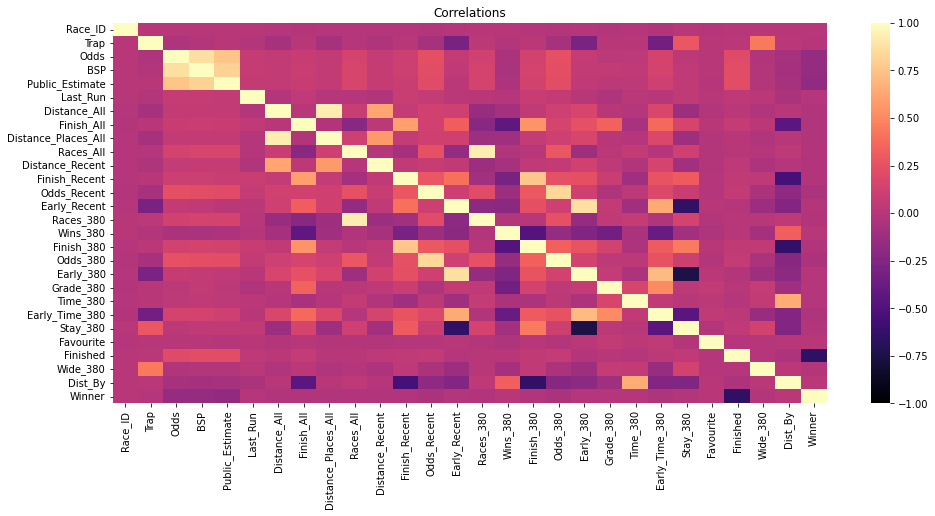

In [ ]:
# Visualise correlations with heatmap
# Can see strong correlations between Odds, BSP and Public estimate as expected

plt.figure(figsize = (16,7))
sns.heatmap(df.corr(), vmin=-1.0, cmap='magma')
plt.title('Correlations')
plt.show()

# Train, test, split!

In [13]:
# Create a list for the feature columns
# Finished and winner are removed as these are our targets to predict

feature_cols = list(df.columns)
feature_cols.remove('Finished')
feature_cols.remove('Winner')

In [14]:
# Define X and y based on feature columns and prediction target
# Focusing on winning greyhounds rather than finish position for now

X = df[feature_cols]
y = df['Winner']

In [15]:
# Split the data into train and test sets (80/20 split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [16]:
# Check the shape of the data to see that it has split correctly

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(9604, 26) (9604,) (2402, 26) (2402,)


In [17]:
# Feature engineer function to add a constant and remove the Race ID as this will not influence a win

def feature_eng(df):
  df = df.copy()
  df = sm.add_constant(df)
  df.drop(inplace = True, columns = ['Race_ID'])

  return df

In [18]:
# Feature engineer the X sets containing the feature columns

X_train_eng = feature_eng(X_train)
X_test_eng = feature_eng(X_test)

In [19]:
# Check this has worked 

X_train_eng.head()

,const,Trap,Odds,BSP,Public_Estimate,Last_Run,Distance_All,Finish_All,Distance_Places_All,Races_All,Distance_Recent,Finish_Recent,Odds_Recent,Early_Recent,Races_380,Wins_380,Finish_380,Odds_380,Early_380,Grade_380,Time_380,Early_Time_380,Stay_380,Favourite,Wide_380,Dist_By
10344,1.0,1,5.50,8.82,4,7,380.00,3.60,380.00,50,380.0,4.14,6.00,5.43,46,0.15,4.14,6.00,5.43,7.86,24.63,3.79,-1.29,5.0,0.00,-3.29
6277,1.0,5,4.50,5.90,2,5,380.00,3.48,380.00,18,380.0,3.29,3.82,3.71,14,0.14,3.29,3.82,3.71,6.57,24.44,3.65,-0.42,1.0,0.29,-5.11
10907,1.0,6,2.75,3.60,1,14,446.21,2.75,438.82,29,380.0,2.40,4.90,4.29,5,0.20,2.20,4.90,4.40,5.00,24.09,3.70,-2.20,6.0,0.20,-1.65
11018,1.0,4,7.00,9.93,5,7,410.54,3.28,384.53,48,380.0,3.71,4.93,4.71,32,0.12,3.71,4.93,4.71,5.29,24.28,3.75,-1.00,2.0,0.00,-4.89
10875,1.0,3,4.00,4.20,1,10,374.07,3.08,369.62,14,380.0,2.71,3.26,3.71,9,0.33,2.71,3.26,3.71,4.14,24.06,3.66,-1.00,3.0,0.00,-3.36


# Functions

In [20]:
# Logistic regression funtion

def run_logit(dfx, dfy, feature_cols):
  y = dfy
  X = dfx[feature_cols]
  return sm.Logit(y, X).fit()

In [21]:
# APR function

def apr(y_pred, y_real):
    accuracy = accuracy_score(y_real, y_pred)
    precision = precision_score(y_real, y_pred)
    recall = recall_score(y_real, y_pred)
    f1 = f1_score(y_real, y_pred)

    print(f"Accuracy:{accuracy}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"F1:{f1}")
    return accuracy, precision, recall, f1

In [22]:
#Metrics functions

##positive label = y = 1 class 
##negative label = y = 0 class 

## y = Winner
## y = 1 'Won'
## y = 0 'Losr'

def produce_confusion(positive_label, negative_label, cut_off, dfx, dfy, y_pred_name):

    #Set pred to 0 or 1 depending on whether it's higher than the cut_off point.
    dfx['pred_binary'] = np.where(dfx['prediction'] > cut_off , 1, 0)

    #Build the CM
    cm = confusion_matrix(dfy, dfx['pred_binary'])

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g'); 

    # labels, title, ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('Real labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels([negative_label, positive_label])
    ax.yaxis.set_ticklabels([negative_label, positive_label]);

    print('Test accuracy = ', accuracy_score(dfy, dfx['pred_binary']))

    return accuracy_score(dfy, dfx['pred_binary'])


def metrics(dfx, dfy, model, cut_off, feature_cols):


    params = model.params
    model.summary()

    dfx['prediction'] = model.predict(dfx[feature_cols])
    accuracy = produce_confusion('Winner', 'Loser', cut_off, dfx, dfy, 'Winner')
    dfx['pred_bins'] = pd.cut(dfx['prediction'], np.arange(0.05,0.95,0.05))
    dfx = pd.concat([dfx, dfy], axis =1, join="inner" )
    summary = dfx.groupby('pred_bins').agg({'Winner':'mean', 'prediction':['mean','count']})
    summary = summary.reset_index()
    summary.columns = ['pred_bins','%_Won','avg_prediction','count']

    #start bubble chart
    plt.figure(figsize=(5, 5), dpi=70)
    plt.axis([0, 1, 0, 1])
    plt.scatter(summary['avg_prediction'], summary['%_Won'], s=summary['count'])
    plt.plot(summary['avg_prediction'], summary['avg_prediction'], color='grey')
    plt.xlabel('Logistic model probabilities')
    plt.ylabel('% Won')
    plt.show()

    #start AUC
    logit_roc_auc = roc_auc_score(dfx['Winner'], dfx['prediction'])
    fpr, tpr, thresholds = roc_curve(dfx['Winner'], dfx['prediction'])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Trying different models

## Run logistic regression

In [ ]:
# Try out different test columns to get best performance, removing higher P values one by one

test_cols = ['const',
 #'Trap',
 'Odds',
 'BSP',
 'Public_Estimate',
 #'Last_Run',
 #'Distance_All',
 'Finish_All',
 'Distance_Places_All',
 #'Races_All',
 'Distance_Recent',
 #'Finish_Recent',
 #'Odds_Recent',
 #'Early_Recent',
 #'Races_380',
 'Wins_380',
 #'Finish_380',
 #'Odds_380',
 #'Early_380',
 #'Grade_380',
 #'Time_380',
 #'Early_Time_380',
 #'Stay_380',
 #'Favourite',
 'Wide_380']
 #'Dist_By'

In [ ]:
# Running the model using the function

test_1 = run_logit(X_train_eng, y_train, test_cols)
test_1.summary()

Optimization terminated successfully.
         Current function value: 0.434222
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Winner   No. Observations:                 9604
Model:                          Logit   Df Residuals:                     9595
Method:                           MLE   Df Model:                            8
Date:                Tue, 28 Sep 2021   Pseudo R-squ.:                 0.04100
Time:                        07:57:27   Log-Likelihood:                -4170.3
converged:                       True   LL-Null:                       -4348.6
Covariance Type:            nonrobust   LLR p-value:                 3.490e-72
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6794      0.505      1.345      0.179      -0.310       1.669
Odds                   -0.0621      0.034     -1.822      0.068      -0.129       0.005
BSP                    -0.0577      0.022     -2.676      0.007      -0.100      -0.015
Public_Estimate        -0.1344      0.033     -4.084      0.000      -0.199      -0.070
Finish_All             -0.1426      0.060     -2.393      0.017      -0.259      -0.026
Distance_Places_All    -0.0031      0.001     -2.504      0.012      -0.005      -0.001
Distance_Recent         0.0018      0.001      1.724      0.085      -0.000       0.004
Wins_380               -0.4898      0.249     -1.968      0.049      -0.978      -0.002
Wide_380               -0.3226      0.189     -1.706      0.088      -0.693       0.048
=======================================================================================
"""

Test accuracy =  0.7656184922948771


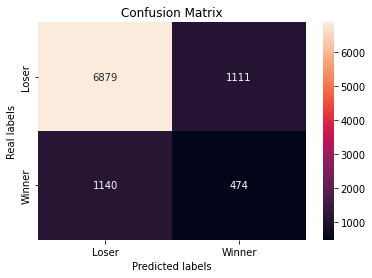

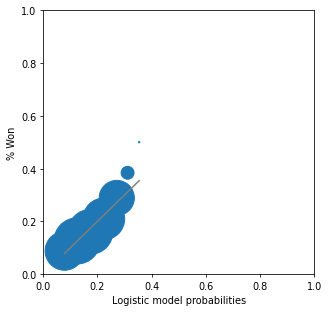

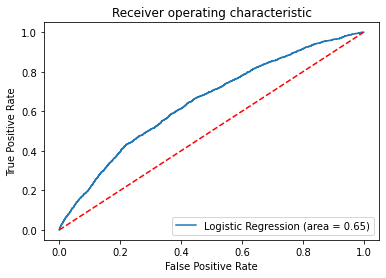

In [ ]:
# Train metrics
# Cut-off is 0.247 as this will assign roughly 1/6 horses winning - as expected

metrics(X_train_eng, y_train, test_1, 0.247, test_cols)

Test accuracy =  0.7643630308076603


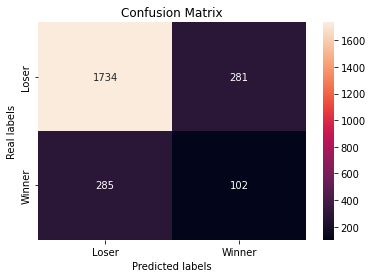

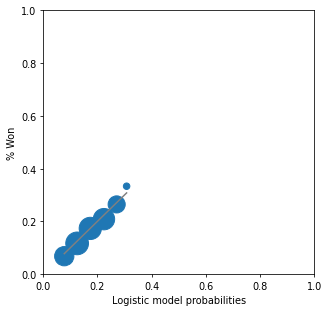

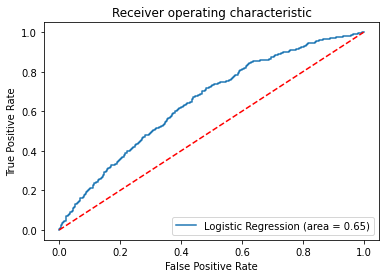

In [ ]:
# Testing on test

metrics(X_test_eng, y_test, test_1, 0.247, test_cols)

In [ ]:
# Check how many predicted winners vs losers as this should be a 1:5 ratio

X_train_eng.pred_binary.value_counts()

0    8019
1    1585
Name: pred_binary, dtype: int64

In [ ]:
# APR for Train
## Very low F1 score so still not a great model

apr(X_train_eng['pred_binary'], y_train)

Accuracy:0.7656184922948771
Precision:0.29905362776025235
Recall:0.2936802973977695
F1:0.2963426070647077


(0.7656184922948771,
 0.29905362776025235,
 0.2936802973977695,
 0.2963426070647077)

In [ ]:
# APR for Test

apr(X_test_eng['pred_binary'], y_test)

Accuracy:0.7643630308076603
Precision:0.26631853785900783
Recall:0.26356589147286824
F1:0.26493506493506497


(0.7643630308076603,
 0.26631853785900783,
 0.26356589147286824,
 0.26493506493506497)

## SVM

In [ ]:
test_cols2 = ['const',
 'Trap',
 'Odds',
 'BSP',
 'Public_Estimate',
 'Last_Run',
 'Distance_All',
 'Finish_All',
 'Distance_Places_All',
 'Races_All',
 'Distance_Recent',
 'Finish_Recent',
 'Odds_Recent',
 'Early_Recent',
 'Races_380',
 'Wins_380',
 'Finish_380',
 'Odds_380',
 'Early_380',
 'Grade_380',
 'Time_380',
 'Early_Time_380',
 'Stay_380',
 'Favourite',
 'Wide_380',
 'Dist_By']


In [ ]:
X_train_eng2 = feature_eng(X_train)
X_test_eng2 = feature_eng(X_test)

In [ ]:
# Normalise the data

X_train2 = X_train_eng2[test_cols2]
X_test2 = X_test_eng2[test_cols2]
X_train_norm = preprocessing.scale(X_train2)
X_test_norm = preprocessing.scale(X_test2)

In [ ]:
# kernel was tested with linear option as well but this took over an hour so the process was ended

tuned_parameters = [{'kernel': ['rbf', 'poly', 'sigmoid'],
                     'gamma': [0.1, 1e-2, 1e-3, 1e-4],'C': [1, 10, 100, 1000]}]

In [ ]:
# Train the model with the tuned parameters

train = GridSearchCV(SVC(), tuned_parameters, scoring='accuracy')

In [ ]:
# Fit the trained model to the train set

train.fit(X_train_norm, y_train)

In [ ]:
# The best parameters for svm model are c:1, gamma:0.01, and kernel:rbf 
# However, this provided no precision or recall and was hence tested manually to find sigmoid was better suited

train.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
# Running  model

svc_model = SVC(gamma=0.01
              , kernel='sigmoid'
              , C=1)

svc_model.fit(X_train_norm, y_train)

SVC(C=1, cache_size=None, class_weight={}, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.01, gpu_id=0,
    kernel='sigmoid', max_iter=-1, max_mem_size=-1, n_jobs=-1,
    probability=False, random_state=None, shrinking=False, tol=0.001,
    verbose=False)

In [ ]:
#Score for train set
accuracy_score(y_train, svc_model.predict(X_train_norm))

0.8144523115368596

In [ ]:
# Results for Train

X_train_results = X_train_eng2.copy()
X_train_results['y_real'] = y_train
X_train_results['y_pred'] = svc_model.predict(X_train_norm)

In [ ]:
# APR results for train
# Was unable to predict any winners

apr(X_train_results['y_pred'], y_train)

Accuracy:0.8144523115368596
Precision:0.12831858407079647
Recall:0.017967781908302356
F1:0.03152173913043478


(0.8144523115368596,
 0.12831858407079647,
 0.017967781908302356,
 0.03152173913043478)

In [ ]:
# Results for Test

X_test_results = X_test_eng2.copy()
X_test_results['y_real'] = y_test
X_test_results['y_pred'] = svc_model.predict(X_test_norm)

In [ ]:
# APR results for test
# Was unable to predict any winners

apr(X_test_results['y_pred'], y_test)

Accuracy:0.8193172356369692
Precision:0.13846153846153847
Recall:0.023255813953488372
F1:0.03982300884955753


(0.8193172356369692,
 0.13846153846153847,
 0.023255813953488372,
 0.03982300884955753)

## Decision Trees


In [42]:
# Narrowed columns down based on importance, these were the only values that were not 0

tree_cols = ['BSP',
 'Wins_380',
 'Odds_380']

In [43]:
X_train_tree = X_train_eng[tree_cols]
X_test_tree = X_test_eng[tree_cols]

In [44]:
tree = DecisionTreeClassifier(random_state=124, max_depth=3, min_samples_leaf=5, min_samples_split=5)

scores = cross_val_score(tree, X_train_tree, y_train, cv = 5)

In [45]:
tree.fit(X_train_tree, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=124, splitter='best')

In [46]:
# Print out the cross validation scores

scores

array([0.83185841, 0.83185841, 0.83133784, 0.83185841, 0.83229167])

In [47]:
# Use gridsearch to create the best possible model

tree_model = GridSearchCV(estimator = DecisionTreeClassifier(),
                   param_grid = {'max_depth': [3, 5, 7, 10],
                                'min_samples_split': [5, 10, 15, 20],
                                'min_samples_leaf': [2, 3, 4, 5, 6, 7]},
                    cv = 5,
                    refit = True,
                    verbose = 1,
                    scoring = 'accuracy')

In [48]:
# Fit the model to the train set

now = time()

tree_model.fit(X_train_tree, y_train)

print(f' Time in seconds: {time() - now}')

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 Time in seconds: 5.525501728057861


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    5.5s finished


In [49]:
# Check which are the best parameters for the model

tree_model.best_params_

{'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 5}

In [50]:
# Get accuracy score for train

tree_model.score(X_train_tree, y_train)

0.831945022907122

In [51]:
# Fit model to test set

tree_model.fit(X_test_tree, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    2.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7, 10],
                         

In [52]:
# Accuracy score for test 

tree_model.score(X_test_tree, y_test)

0.8417985012489592

In [53]:
# Results for Train

X_train_results = X_train_tree.copy()
X_train_results['y_real'] = y_train
X_train_results['y_pred'] = (tree_model.predict_proba(X_train_tree)[:,1] >= 0.247).astype('int')
X_train_results['y_prob'] = tree_model.predict_proba(X_train_tree)[:,1]

In [54]:
apr(X_train_results['y_pred'], y_train)

Accuracy:0.7268846314035818
Precision:0.27547841566533154
Recall:0.38351920693928127
F1:0.3206423206423206


(0.7268846314035818,
 0.27547841566533154,
 0.38351920693928127,
 0.3206423206423206)

In [55]:
# Results for Test

X_test_results = X_test_tree.copy()
X_test_results['y_real'] = y_test
X_test_results['y_pred'] = (tree_model.predict_proba(X_test_tree)[:,1] >= 0.247).astype('int')
X_test_results['y_prob'] = tree_model.predict_proba(X_test_tree)[:,1]

In [56]:
# APR for Test

apr(X_test_results['y_pred'], y_test)

Accuracy:0.7398001665278934
Precision:0.2851985559566787
Recall:0.4082687338501292
F1:0.3358129649309245


(0.7398001665278934,
 0.2851985559566787,
 0.4082687338501292,
 0.3358129649309245)

In [57]:
#Feature Importance to decide feature cols

importance = list(zip(tree_cols, list(tree.feature_importances_)))

In [58]:
importance.sort(key=lambda x:x[1], reverse=True)

In [59]:
importance

[('BSP', 0.9350040783049912),
 ('Wins_380', 0.03262092203261485),
 ('Odds_380', 0.03237499966239395)]

### Random Forest

In [60]:
# Narrowed columns down based on importance, 13 features with lowest removed

tree_cols = [#'Trap',
 'Odds',
 'BSP',
 'Public_Estimate',
 #'Last_Run',
 'Distance_All',
 'Finish_All',
 'Distance_Places_All',
 #'Races_All',
 #'Distance_Recent',
 #'Finish_Recent',
 'Odds_Recent',
 #'Early_Recent',
 'Races_380',
 #'Wins_380',
 #'Finish_380',
 'Odds_380',
 #'Early_380',
 #'Grade_380',
 'Time_380',
 #'Early_Time_380',
 'Stay_380',
 #'Favourite',
 #'Wide_380',
 'Dist_By']

In [61]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=5, min_samples_split=10)
et = ExtraTreesClassifier(n_estimators=100, max_depth=3, min_samples_leaf=5, min_samples_split=10)

In [62]:
rf_score = cross_val_score(rf, X_train_tree, y_train, cv=5).mean()
et_score = cross_val_score(et, X_train_tree, y_train, cv=5).mean()

In [63]:
print(f'Random scored {rf_score}')
print(f'Extra Random scored {et_score}')

Random scored 0.8319450589970501
Extra Random scored 0.8319450589970501


In [64]:
#Fitting Random Forest to data

rf.fit(X_train_tree, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
# Results for Train

X_train_results = X_train_tree.copy()
X_train_results['y_real'] = y_train
X_train_results['y_pred'] = (rf.predict_proba(X_train_tree)[:,1] >= 0.247).astype('int')
X_train_results['y_prob'] = rf.predict_proba(X_train_tree)[:,1]

In [66]:
#APR for Train

apr(X_train_results['y_pred'], y_train)

Accuracy:0.8096626405664307
Precision:0.35958005249343833
Recall:0.1697645600991326
F1:0.23063973063973064


(0.8096626405664307,
 0.35958005249343833,
 0.1697645600991326,
 0.23063973063973064)

In [ ]:
#Results for Test

X_test_results = X_test_tree.copy()
X_test_results['y_real'] = y_test
X_test_results['y_pred'] = (rf.predict_proba(X_test_tree)[:,1] >= 0.247).astype('int')
X_test_results['y_prob'] = rf.predict_proba(X_test_tree)[:,1]

In [ ]:
#APR for Test

apr(X_test_results['y_pred'], y_test)

Accuracy:0.7901748542880933
Precision:0.30303030303030304
Recall:0.23255813953488372
F1:0.2631578947368421


(0.7901748542880933,
 0.30303030303030304,
 0.23255813953488372,
 0.2631578947368421)

In [ ]:
#Gridsearch to find best parameters. 
rf_params = {
    'n_estimators': [100],
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf' : [2, 3, 4, 5, 6, 7],
    'min_samples_split': [5, 10, 20, 30, 40, 50]
 }


gs = GridSearchCV(rf, param_grid=rf_params, cv=5)

gs.fit(X_train_tree, y_train)

print(gs.best_score_)

gs.best_params_

0.8321532838799236


{'max_depth': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 40,
 'n_estimators': 100}

In [ ]:
gs.score(X_train_tree, y_train)

0.8329862557267805

In [ ]:
# Results for Train

X_train_results = X_train_tree.copy()
X_train_results['y_real'] = y_train
X_train_results['y_pred'] = (gs.predict_proba(X_train_tree)[:,1] >= 0.247).astype('int')
X_train_results['y_prob'] = gs.predict_proba(X_train_tree)[:,1]

In [ ]:
apr(X_train_results['y_pred'], y_train)

Accuracy:0.8242399000416493
Precision:0.4774939172749392
Recall:0.48636926889714993
F1:0.48189073050951503


(0.8242399000416493,
 0.4774939172749392,
 0.48636926889714993,
 0.48189073050951503)

In [ ]:
#Results for Test

X_test_results = X_test_tree.copy()
X_test_results['y_real'] = y_test
X_test_results['y_pred'] = (gs.predict_proba(X_test_tree)[:,1] >= 0.247).astype('int')
X_test_results['y_prob'] = gs.predict_proba(X_test_tree)[:,1]

In [ ]:
#APR for Test

apr(X_test_results['y_pred'], y_test)

Accuracy:0.7731057452123231
Precision:0.2931937172774869
Recall:0.28940568475452194
F1:0.29128738621586475


(0.7731057452123231,
 0.2931937172774869,
 0.28940568475452194,
 0.29128738621586475)

In [ ]:
#Bagging
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier())

##
bag.fit(X_train_tree, y_train)

##
bag.score(X_test_tree, y_test)

0.8218151540383014

In [ ]:
#Fitting bagging to data

bag.fit(X_train_tree, y_train)

In [ ]:
# Results for Train

X_train_results = X_train_tree.copy()
X_train_results['y_real'] = y_train
X_train_results['y_pred'] = (bag.predict_proba(X_train_tree)[:,1] >= 0.247).astype('int')
X_train_results['y_prob'] = bag.predict_proba(X_train_tree)[:,1]

In [ ]:
apr(X_train_results['y_pred'], y_train)

Accuracy:0.964493960849646
Precision:0.8262429523321374
Recall:0.9987608426270136
F1:0.9043478260869565


(0.964493960849646, 0.8262429523321374, 0.9987608426270136, 0.9043478260869565)

In [ ]:
#Results for Test

X_test_results = X_test_tree.copy()
X_test_results['y_real'] = y_test
X_test_results['y_pred'] = (bag.predict_proba(X_test_tree)[:,1] >= 0.247).astype('int')
X_test_results['y_prob'] = bag.predict_proba(X_test_tree)[:,1]

In [ ]:
#APR for Test

apr(X_test_results['y_pred'], y_test)

Accuracy:0.644879267277269
Precision:0.19661458333333334
Recall:0.39018087855297157
F1:0.26147186147186147


(0.644879267277269,
 0.19661458333333334,
 0.39018087855297157,
 0.26147186147186147)

# Improving random forest model

In [ ]:
# Best APR scores with odds, bsp, distance all, finish all, races all, odds recent, odds 380, time 380, dist by

tree_cols = [#'Trap',
 'Odds',
 'BSP',
 #'Public_Estimate',
 #'Last_Run',
 'Distance_All',
 'Finish_All',
 #'Distance_Places_All',
 'Races_All',
 #'Distance_Recent',
 #'Finish_Recent',
 'Odds_Recent',
 #'Early_Recent',
 #'Races_380',
 #'Wins_380',
 #'Finish_380',
 'Odds_380',
 #'Early_380',
 #'Grade_380',
 'Time_380',
 #'Early_Time_380',
 #'Stay_380',
 #'Favourite',
 #'Wide_380',
 'Dist_By']

In [ ]:
X_train_tree = X_train_eng[tree_cols]
X_test_tree = X_test_eng[tree_cols]

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=6, min_samples_split=30)
et = ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_leaf=6, min_samples_split=30)

In [ ]:
rf_score = cross_val_score(rf, X_train_tree, y_train, cv=5).mean()
et_score = cross_val_score(et, X_train_tree, y_train, cv=5).mean()

In [ ]:
print(f'Random scored {rf_score}')
print(f'Extra Random scored {et_score}')

Random scored 0.8319450047718202
Extra Random scored 0.8319450589970501


In [ ]:
# Gridsearch for best parameters

rf_params = {
    'n_estimators': [100],
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf' : [2, 3, 4, 5, 6, 7],
    'min_samples_split': [5, 10, 20, 30, 40, 50]
 }


gs = GridSearchCV(rf, param_grid=rf_params, cv=5)

gs.fit(X_train_tree, y_train)

print(gs.best_score_)

gs.best_params_

In [ ]:
gs.score(X_train_tree, y_train)

0.8320491461890879

In [ ]:
rf.fit(X_train_tree, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Results for Train

X_train_results = X_train_tree.copy()
X_train_results['y_real'] = y_train
X_train_results['y_pred'] = (gs.predict_proba(X_train_tree)[:,1] >= 0.247).astype('int')
X_train_results['y_prob'] = gs.predict_proba(X_train_tree)[:,1]

In [ ]:
X_train_results.head(20)

In [ ]:
# Original test
# Accuracy:0.7808204914618909, Precision:0.3237616654702082, Recall:0.27942998760842624, F1:0.29996674426338543

# Test 1: - all columns
# Train: Accuracy:0.8439192003331945, Precision:0.5357364822871349, Recall:0.5340768277571252, F1:0.5349053676698728
# Test: Accuracy:0.7643630308076603, Precision:0.27901234567901234, Recall:0.29198966408268734, F1:0.2853535353535353

# Test 2: - getting rid of 380, performs better for test
# Train: Accuracy:0.8243440233236151, Precision:0.4782608695652174, Recall:0.49752168525402723, F1:0.4877011843303978
# Test: Accuracy:0.765195670274771, Precision:0.2846715328467153, Recall:0.3023255813953488, F1:0.2932330827067669

# Test 3: - getting rid of other features and public est
# Train: Accuracy:0.8465222823823407, Precision:0.5452781371280725, Recall:0.5223048327137546, F1:0.5335443037974684
# Test: Accuracy:0.7776852622814321, Precision:0.2905982905982906, Recall:0.26356589147286824, F1:0.2764227642276423

# Test 4: - keeping just info about 380 races
# Accuracy:0.8371511870054145, Precision:0.5158629441624365, Recall:0.5037174721189591, F1:0.509717868338558
# Accuracy:0.7751873438800999, Precision:0.2992125984251969, Recall:0.29457364341085274, F1:0.29687500000000006

# Test 5: - removing one at a time based on importance to beat test 4

# Without favourite & wide 380
## Train: Accuracy:0.8429820907955019, Precision:0.5323170731707317, Recall:0.5408921933085502, F1:0.5365703749231715
## Test: Accuracy:0.7689425478767694, Precision:0.29411764705882354, Recall:0.31007751937984496, F1:0.30188679245283023

# With odds, bsp, distance all, finish all, races all, odds recent, odds 380, time 380, dist by
## Train: Accuracy:0.8330903790087464, Precision:0.5035644847699287, Recall:0.48141263940520446, F1:0.49223946784922396
## Test: Accuracy:0.7851790174854288, Precision:0.32132963988919666, Recall:0.2997416020671835, F1:0.3101604278074866

In [ ]:
#APR for Train

apr(X_train_results['y_pred'], y_train)

Accuracy:0.8330903790087464
Precision:0.5035644847699287
Recall:0.48141263940520446
F1:0.49223946784922396


(0.8330903790087464,
 0.5035644847699287,
 0.48141263940520446,
 0.49223946784922396)

In [ ]:
#Results for Test

X_test_results = X_test_tree.copy()
X_test_results['y_real'] = y_test
X_test_results['y_pred'] = (rf.predict_proba(X_test_tree)[:,1] >= 0.247).astype('int')
X_test_results['y_prob'] = rf.predict_proba(X_test_tree)[:,1]

In [ ]:
#APR for Test

apr(X_test_results['y_pred'], y_test)

Accuracy:0.7851790174854288
Precision:0.32132963988919666
Recall:0.2997416020671835
F1:0.3101604278074866


(0.7851790174854288,
 0.32132963988919666,
 0.2997416020671835,
 0.3101604278074866)

In [ ]:
#Feature Importance to decide feature cols

importance = list(zip(tree_cols, list(rf.feature_importances_)))

In [ ]:
importance.sort(key=lambda x:x[1], reverse=True)

In [ ]:
importance

[('BSP', 0.2362310529126329),
 ('Odds', 0.1253792691105503),
 ('Finish_All', 0.09621086628674058),
 ('Odds_Recent', 0.09154967300338408),
 ('Distance_All', 0.09072192468812997),
 ('Odds_380', 0.09053397868500504),
 ('Time_380', 0.09040957445373153),
 ('Dist_By', 0.09002858180001486),
 ('Races_All', 0.08893507905981064)]

# List of greyhound winning probabilities

In [ ]:
#Concatenating model results into one df

wins_modelled = pd.concat([X_train_results, X_test_results], axis =0, join='inner')

In [ ]:
#Sorting Index

wins_modelled.sort_index(ascending=True, inplace=True)

In [ ]:
wins_modelled.tail()

,Odds,BSP,Distance_All,Finish_All,Races_All,Odds_Recent,Odds_380,Time_380,Dist_By,y_real,y_pred,y_prob
12001,3.5,4.67,408.19,3.25,52,5.42,5.36000,24.13,-3.50000,0,0,0.164428
12002,7.0,9.36,418.62,3.82,58,6.55,6.43000,20.81,-12.43000,0,0,0.123520
12003,5.0,4.35,400.00,4.05,9,8.00,8.00000,24.36,-4.75000,0,1,0.251900
12004,4.0,3.86,436.36,4.82,22,6.75,5.29702,24.13,-4.48688,0,0,0.191238
12005,5.0,8.31,418.18,5.66,22,5.75,5.67000,16.35,-21.00000,0,0,0.123853


In [ ]:
wins_modelled.to_csv('wins_modelled.csv', index=False)

# Splitting by race ID so only one winner selected per race


In [ ]:
#Mask for race ID

race_id = df['Race_ID']

In [ ]:
#Bringing back Race ID

wins_modelled = wins_modelled.assign(Race_ID = race_id)

In [ ]:
# Selecting columns

wins_modelled = wins_modelled[['Race_ID','Odds', 'BSP', 'Distance_All', 'Finish_All', 'Races_All', 'Odds_Recent',
       'Odds_380', 'Time_380', 'Dist_By', 'y_real', 'y_pred', 'y_prob']]

In [ ]:
wins_modelled.head(12)

,Race_ID,Odds,BSP,Distance_All,Finish_All,Races_All,Odds_Recent,Odds_380,Time_380,Dist_By,y_real,y_pred,y_prob
0,0,2.75,4.00,456.47,4.09,17,4.42,4.38,17.84,-10.50,0,1,0.257452
1,0,5.00,7.60,410.48,3.53,21,4.04,4.04,24.18,-4.71,1,0,0.152783
2,0,5.00,9.40,386.45,3.39,31,4.46,4.46,24.06,-2.86,0,0,0.097701
3,0,7.00,7.80,380.00,3.03,21,5.46,5.46,24.14,-2.71,0,0,0.108017
4,0,5.00,5.10,385.00,2.59,40,4.18,4.18,24.05,-2.32,0,0,0.242630
5,0,6.00,5.34,418.65,3.27,52,5.89,5.89,24.14,-4.43,0,0,0.138575
6,1,6.00,10.16,455.21,3.22,117,5.79,5.79,24.05,-0.43,0,0,0.070299
7,1,5.00,8.60,479.52,3.91,93,5.46,5.46,24.42,-5.71,0,0,0.109958
8,1,4.00,4.50,388.33,2.84,12,5.42,5.50,24.18,-1.39,0,0,0.137050
9,1,5.00,5.14,400.87,3.35,138,7.60,7.00,20.69,-11.00,0,0,0.194084


In [ ]:
wins_modelled['One_winner'] = 0

In [ ]:
# Select the greyhound with the highest probability for each

highest_prob = wins_modelled.sort_values('y_prob').drop_duplicates('Race_ID', keep='last')

In [ ]:
# Create new column to assign them as the one winner

highest_prob['One_winner'] = 1

In [ ]:
index_list = list(highest_prob.index)

In [ ]:
lowest_prob = wins_modelled.drop(index = index_list)

In [ ]:
lowest_prob.head(12)

,Race_ID,Odds,BSP,Distance_All,Finish_All,Races_All,Odds_Recent,Odds_380,Time_380,Dist_By,y_real,y_pred,y_prob,One_winner
1,0,5.0,7.60,410.48,3.53,21,4.04,4.04,24.18,-4.71,1,0,0.152783,0
2,0,5.0,9.40,386.45,3.39,31,4.46,4.46,24.06,-2.86,0,0,0.097701,0
3,0,7.0,7.80,380.00,3.03,21,5.46,5.46,24.14,-2.71,0,0,0.108017,0
4,0,5.0,5.10,385.00,2.59,40,4.18,4.18,24.05,-2.32,0,0,0.242630,0
5,0,6.0,5.34,418.65,3.27,52,5.89,5.89,24.14,-4.43,0,0,0.138575,0
6,1,6.0,10.16,455.21,3.22,117,5.79,5.79,24.05,-0.43,0,0,0.070299,0
7,1,5.0,8.60,479.52,3.91,93,5.46,5.46,24.42,-5.71,0,0,0.109958,0
8,1,4.0,4.50,388.33,2.84,12,5.42,5.50,24.18,-1.39,0,0,0.137050,0
9,1,5.0,5.14,400.87,3.35,138,7.60,7.00,20.69,-11.00,0,0,0.194084,0
11,1,7.0,8.68,438.35,3.22,52,4.86,4.46,20.70,-8.04,0,0,0.108139,0


In [ ]:
one_winner = pd.concat([lowest_prob, highest_prob], axis =0, join='inner').sort_values('Race_ID').reset_index()

In [ ]:
# Selecting columns

one_winner = one_winner[['Race_ID', 'Odds', 'BSP', 'Distance_All', 'Finish_All',
       'Races_All', 'Odds_Recent', 'Odds_380', 'Time_380', 'Dist_By', 'y_real',
       'y_pred', 'y_prob', 'One_winner']]

In [ ]:
one_winner.head(12)

,Race_ID,Odds,BSP,Distance_All,Finish_All,Races_All,Odds_Recent,Odds_380,Time_380,Dist_By,y_real,y_pred,y_prob,One_winner
0,0,5.00,7.60,410.48,3.53,21,4.04,4.04,24.18,-4.71,1,0,0.152783,0
1,0,5.00,9.40,386.45,3.39,31,4.46,4.46,24.06,-2.86,0,0,0.097701,0
2,0,7.00,7.80,380.00,3.03,21,5.46,5.46,24.14,-2.71,0,0,0.108017,0
3,0,5.00,5.10,385.00,2.59,40,4.18,4.18,24.05,-2.32,0,0,0.242630,0
4,0,6.00,5.34,418.65,3.27,52,5.89,5.89,24.14,-4.43,0,0,0.138575,0
5,0,2.75,4.00,456.47,4.09,17,4.42,4.38,17.84,-10.50,0,1,0.257452,1
6,1,7.00,8.68,438.35,3.22,52,4.86,4.46,20.70,-8.04,0,0,0.108139,0
7,1,5.00,5.14,400.87,3.35,138,7.60,7.00,20.69,-11.00,0,0,0.194084,0
8,1,3.50,3.83,451.62,3.11,40,6.93,5.71,24.08,-2.21,1,1,0.285762,1
9,1,5.00,8.60,479.52,3.91,93,5.46,5.46,24.42,-5.71,0,0,0.109958,0


In [ ]:
one_winner.to_csv('one_winner.csv', index=False)

## Performance of one winner model

In [ ]:
# The APR for our original model

apr(one_winner['y_pred'], one_winner['y_real'])

Accuracy:0.8235049142095618
Precision:0.4690126050420168
Recall:0.44627686156921537
F1:0.4573623559539053


(0.8235049142095618,
 0.4690126050420168,
 0.44627686156921537,
 0.4573623559539053)

In [ ]:
# The APR for single winner model - slightly worse than the other! 
## Next step to select the top 3 winners as this may improve results and it is something you can bet on still

apr(one_winner['One_winner'], one_winner['y_real'])

Accuracy:0.8169248708978843
Precision:0.45077461269365315
Recall:0.45077461269365315
F1:0.45077461269365315


(0.8169248708978843,
 0.45077461269365315,
 0.45077461269365315,
 0.45077461269365315)

# Selecting the top 3 greyhounds for a race

In [ ]:
wins_modelled.head(12)

In [ ]:
wins_modelled['Top_three'] = 0

In [ ]:
wins_modelled.head(12)

In [ ]:
# Select top 3 greyhounds with the highest probability for each race

first_prob = wins_modelled.sort_values('y_prob').drop_duplicates('Race_ID', keep='last')

In [ ]:
# Create new column to assign them as the one winner

first_prob['Top_three'] = 1

In [ ]:
index_list = list(first_prob.index)

In [ ]:
lowest_prob = wins_modelled.drop(index = index_list)

In [ ]:
lowest_prob.head(12)

In [ ]:
second_prob = lowest_prob.sort_values('y_prob').drop_duplicates('Race_ID', keep='last')

In [ ]:
second_prob['Top_three'] = 1

In [ ]:
index_list = list(second_prob.index)

In [ ]:
lowest_prob = lowest_prob.drop(index = index_list)

In [ ]:
third_prob = lowest_prob.sort_values('y_prob').drop_duplicates('Race_ID', keep='last')

In [ ]:
third_prob['Top_three'] = 1

In [ ]:
index_list = list(third_prob.index)

In [ ]:
lowest_prob = lowest_prob.drop(index = index_list)

In [ ]:
lowest_prob.head(12)

In [ ]:
top_three = pd.concat([first_prob, second_prob, third_prob, lowest_prob], axis =0, join='inner')

In [ ]:
# Selecting columns

top_three = top_three[['Race_ID', 'Odds', 'BSP', 'Distance_All', 'Finish_All',
       'Races_All', 'Odds_Recent', 'Odds_380', 'Time_380', 'Dist_By', 'y_real',
       'y_pred', 'y_prob', 'Top_three']]

In [ ]:
top_three.head(12)

,Race_ID,Odds,BSP,Distance_All,Finish_All,Races_All,Odds_Recent,Odds_380,Time_380,Dist_By,y_real,y_pred,y_prob,Top_three,Finished,Real_top
4695,782,5.0,5.25,393.33,5.03,30,4.25,4.11,24.62,-4.29,0,0,0.150195,1,6,0
10089,1681,4.0,5.30,380.00,3.17,41,4.36,4.36,24.03,-3.64,0,0,0.176285,1,5,0
3667,611,5.0,5.00,376.93,3.57,84,5.07,5.07,24.22,-5.54,0,0,0.178345,1,3,1
11865,1977,4.0,4.90,384.00,2.64,50,4.29,4.29,24.17,-4.29,0,0,0.180910,1,3,1
7174,1195,4.0,4.27,380.00,3.30,5,3.50,3.50,24.28,-4.00,0,0,0.182567,1,4,0
9490,1581,3.5,4.01,495.47,2.82,43,3.50,3.50,24.25,-2.29,0,0,0.183428,1,6,0
870,145,4.0,5.60,380.00,3.71,52,5.14,5.14,24.61,-3.71,1,0,0.184162,1,1,1
9616,1602,5.5,7.00,384.10,4.47,39,7.36,7.36,24.67,-5.86,1,0,0.185779,1,1,1
6157,1026,3.5,4.20,380.69,4.36,16,3.62,3.62,24.33,-5.83,0,0,0.186338,1,3,1
1524,254,4.0,4.70,416.40,3.63,55,4.79,4.79,24.50,-4.00,1,0,0.186436,1,1,1


In [ ]:
#Mask for finished position

finished = df['Finished']

In [ ]:
#Bringing back Race ID

top_three = top_three.assign(Finished = finished)

In [ ]:
top_three['Real_top'] = np.where(top_three['Finished'] < 4, 1, 0)

In [ ]:
top_three.to_csv('top_three.csv', index=False)

## Performance of top three model

In [ ]:
# The APR for the original model

apr(top_three['y_pred'], top_three['y_real'])

Accuracy:0.8235049142095618
Precision:0.4690126050420168
Recall:0.44627686156921537
F1:0.4573623559539053


(0.8235049142095618,
 0.4690126050420168,
 0.44627686156921537,
 0.4573623559539053)

In [ ]:
# The APR for the top three
## Better F1 score than our other models but fall in accuracy

apr(top_three['Top_three'], top_three['Real_top'])

Accuracy:0.609112110611361
Precision:0.6093619856738297
Recall:0.6090576090576091
F1:0.6092097593471564


(0.609112110611361, 0.6093619856738297, 0.6090576090576091, 0.6092097593471564)

# Predicting finish positions 1-6

In [ ]:
wins_modelled['Position'] = 0

In [ ]:
# Select greyhounds in order of highest probability for each race

first_prob = wins_modelled.sort_values('y_prob').drop_duplicates('Race_ID', keep='last')

In [ ]:
# Create new column to assign them as the one winner

first_prob['Position'] = 1

In [ ]:
# A list for the index of the winners

index_list = list(first_prob.index)

In [ ]:
# Create new dataset with the losing greyhounds by removing the winners using their index

lowest_prob = wins_modelled.drop(index = index_list)

In [ ]:
# Repeat this to get the remaining positions

second_prob = lowest_prob.sort_values('y_prob').drop_duplicates('Race_ID', keep='last')
second_prob['Position'] = 2
index_list = list(second_prob.index)
lowest_prob = lowest_prob.drop(index = index_list)

In [ ]:
third_prob = lowest_prob.sort_values('y_prob').drop_duplicates('Race_ID', keep='last')
third_prob['Position'] = 3
index_list = list(third_prob.index)
lowest_prob = lowest_prob.drop(index = index_list)

In [ ]:
fourth_prob = lowest_prob.sort_values('y_prob').drop_duplicates('Race_ID', keep='last')
fourth_prob['Position'] = 4
index_list = list(fourth_prob.index)
lowest_prob = lowest_prob.drop(index = index_list)

In [ ]:
fifth_prob = lowest_prob.sort_values('y_prob').drop_duplicates('Race_ID', keep='last')
fifth_prob['Position'] = 5
index_list = list(fifth_prob.index)
lowest_prob = lowest_prob.drop(index = index_list)

In [ ]:
lowest_prob['Position'] = 6

In [ ]:
# Concatenate all the different datasets that have been created for each position

positions = pd.concat([first_prob, second_prob, third_prob, fourth_prob, fifth_prob, lowest_prob], axis =0, join='inner')

In [ ]:
# Selecting columns

positions = positions[['Race_ID', 'Odds', 'BSP', 'Distance_All', 'Finish_All',
       'Races_All', 'Odds_Recent', 'Odds_380', 'Time_380', 'Dist_By', 'y_real',
       'y_pred', 'y_prob', 'Position']]

In [ ]:
positions.sort_values('Race_ID').head(20)

In [ ]:
#Mask for finished position

finished = df['Finished']

In [ ]:
# Bringing back finished position

positions = positions.assign(Finished = finished)

In [ ]:
# Save file containing new column of predicted finish positions

positions.to_csv('positions.csv', index=False)

## Performance of positions model

In [ ]:
# 24.5% of positions guessed correctly - compared to 20.9% from public estimate

(((positions['Finished'] == positions['Position']).sum()) / (positions.shape[0])) * 100

24.529401965683824

# Cut-off for guaranteed winner?

In [ ]:
df = pd.read_csv('wins_modelled.csv')

In [ ]:
# The maximum probability a greyhound achieved for winning a race

df.y_prob.max()

0.5493255769114688

In [ ]:
# Creating dataset for greyhounds with probability over 30%

over3 = df[(df['y_prob'] > 0.3)]

In [ ]:
# Have a look at dataset
over3

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
over4 = df[(df['y_prob'] > 0.4)]

In [ ]:
display(over4)

In [ ]:
over4.shape[0]

169

In [ ]:
over5 = df[(df['y_prob'] > 0.5)]

In [ ]:
display(over5)

,Odds,BSP,Distance_All,Finish_All,Races_All,Odds_Recent,Odds_380,Time_380,Dist_By,y_real,y_pred,y_prob
286,2.00,2.44,358.20,3.29,15,4.18,4.18000,24.35,-3.57000,1,1,0.508452
466,3.00,3.05,394.81,3.00,16,2.58,2.58000,24.08,0.00000,1,1,0.501693
635,2.50,2.40,408.84,3.47,74,5.25,5.25000,24.51,-4.82000,1,1,0.522231
1967,2.00,2.48,400.00,3.86,16,4.46,4.18000,24.47,-2.14000,1,1,0.540487
2184,2.25,2.52,397.14,4.30,49,5.00,5.00000,24.37,-4.21000,1,1,0.549326
2236,2.50,2.28,403.24,3.63,67,5.08,5.00000,20.84,-10.29000,1,1,0.528456
2320,2.00,2.39,380.71,3.26,49,4.46,4.54000,24.17,-4.43000,1,1,0.510459
2493,2.50,2.56,427.66,3.47,94,4.86,5.21000,24.12,-3.14000,1,1,0.522861
3722,1.80,2.04,376.16,3.57,113,4.08,5.32000,24.54,-4.14000,1,1,0.548722
5436,2.00,2.36,402.90,3.59,68,4.50,4.71000,20.83,-9.57000,1,1,0.544633


In [ ]:
over5.shape[0]

21

In [ ]:
(20/21) * 100

95.23809523809523